参考： https://blog.csdn.net/marksinoberg/article/details/70809830

# 1. 抓取热门评论内容

In [44]:
import requests
import json


def getcomments(musicid):
    url = 'http://music.163.com/weapi/v1/resource/comments/R_SO_4_{}?csrf_token='.format(musicid) #{}内为自定义函数getcomments(musicid)的参数，由用户输入的
    payload = {
        'params': 'wh0V9MEwF+aU+XzfrIzcIoovOzMVYAvnNssWEvw2P3C3euuqtzZfo8OJYlZoZ/kE0aAgMBQtvPY2J2MoGVYnIG6FpuAekLc4u4YgjbvPh8GjHqDB7KmIsf0Q87LoSDmq3gXHCEwMPot2CtJae9Uc9d5mDofHna0sKtUH1Z6Cwhp1lynlsm230WNBLdV9TlDn',
        'encSecKey': '0d215e8c122017f2ed2f5d298f0f45aa6f7d59300a655402ded380fd4f1200b34be31cef810ec42639d2f9b33f2a8ffd061873d3faf6d14b1dfd111b0714e175d6f829b7657936adbae8b6c8d46bede24e2266949cfac10f234b1614ec980cf05a22be477d1ce56e87578ec09a47e4cf5f9e23184c354e46afbd49175a9f449d'
    }
    headers = {
        'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_4) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/11.1 Safari/605.1.15',
        'Referer': 'http://music.163.com/song?id={}'.format(musicid),
        'Host': 'music.163.com',
        'Origin': 'http://music.163.com'
    }

    response = requests.post(url=url, headers=headers, data=payload)
    data = json.loads(response.text)
    hotcomments = []
    for hotcomment in data['hotComments']:
        item = {
            'nickname': hotcomment['user']['nickname'], #昵称
            'content': hotcomment['content'] #评论
        } #item是一个字典
        hotcomments.append(item) #hotcomments是一个list

    # 返回热门评论
    return [content['content'] for content in hotcomments] 
    #拆分成两步：for content in 列表hotcomments 
    #第一步：列表的元素是字典，取出其中的一个字典content对应的内容,也就是content['content'] 
    #第二步：将这个字典content加上[]变成列表

if __name__ == '__main__':
    hot = getcomments(375095)
    print(hot) #hot是一个list

['不好意思由於KEY定的太高，我们的副歌部份呢，就请当家花旦，Hebe & Selina帮忙唱一下。', '突然很想听 翻出来怀旧  Ella 变女人了 Hebe 单飞实力唱将  Selina经历了巨大变故 时间走  人在变，唯有音乐永恒', '亲爱的朋友千万不要放弃啊', 'Ella：开什么玩笑，我可是地表最强女rapper', '评论停留在2014年 时间来到2018年。', 'she算实力派还是偶像派，实力派中的偶像派，偶像派中的实力派', '00后好惨的，经历了现在这么烂的华语乐坛，也是不容易', '写歌其实不容易 / 卖歌又要靠运气靠关系 / 难得最好的歌 / 运气好被公司保留 / 但保留不一定会用/ 用又不一定会被打 / 就算变成主打 / 版税可能又会 拖拖拖 / 但是亲爱的朋友 / 你们千万不能放弃啊', '那会的hebe声音还是很甜的 ', '一定要有梦想啊万一实现了呢？', '以前游戏ID一直都叫：听阎维文弹吉他', '当年超级喜欢高潮部分！', '好喜欢听阎维文弹琵琶', '我感觉这首歌是S.H.E作品里面最突出Hebe嗓音的一个…副歌部分太惊艳了……', '那年他才26岁啊，今年都38了。半夜听这个歌突然好心疼。']


note: 列表中存储字典的用法： http://www.cnblogs.com/AaronFan/p/6057264.html

In [45]:
alien_0 = {"color":"green", "points":5}
alien_1 = {"color":"yellow", "points":10}
alien_2 = {"color":"red", "points":15} #alien_0, alien_1和alien_2是三个dict

#把字典存入到列表aliens中   ps:新建一个空的dict用{}而不是[]
aliens = [alien_0, alien_1, alien_2] #aliens是一个list
print(aliens)

#遍历这个列表
for alien in aliens:
    print(alien)
    print(alien['color'])

#type(alien) #aliens这个列表中的每一个元素alien是字典
#type([alien]) #字典外面加上[]变成list

list=[]
list.append(alien)
list #list是一个列表，列表里的每个元素是一个字典alien
type(list)

[{'color': 'green', 'points': 5}, {'color': 'yellow', 'points': 10}, {'color': 'red', 'points': 15}]
{'color': 'green', 'points': 5}
green
{'color': 'yellow', 'points': 10}
yellow
{'color': 'red', 'points': 15}
red


list

# 2. 热门评论保存到本地txt

In [46]:
file=open('/Users/ycy/Desktop/hotcomment_contents.txt','w')  
file.write(str(hot)) #write() argument must be str, not list
file.close()  

# 3. 读取txt内容并结巴分词

In [47]:
text = open(r'/Users/ycy/Desktop/hotcomment_contents.txt',"r").read()


import matplotlib.pyplot as plt     #数学绘图库
import jieba               #分词库
from wordcloud import WordCloud   #词云库


#默认精确模式。可以添加自定义词典userdict.txt,然后jieba.load_userdict(file_name) ,file_name为文件类对象或自定义词典的路径
# 自定义词典格式和默认词库dict.txt一样，一个词占一行：每一行分三部分：词语、词频（可省略）、词性（可省略），用空格隔开，顺序不可颠倒

cut_text= jieba.cut(text)
result= "/".join(cut_text)#必须给个符号分隔开分词结果来形成字符串,否则不能绘制词云
print(result)

[/'/不好意思/由/於/KEY/定/的/太高/，/我们/的/副歌/部份/呢/，/就/请/当家花旦/，/Hebe/ /&/ /Selina/帮忙/唱/一下/。/'/,/ /'/突然/很/想/听/ /翻出来/怀旧/ / /Ella/ /变/女人/了/ /Hebe/ /单飞/实力/唱/将/ / /Selina/经历/了/巨大/变故/ /时间/走/ / /人/在/变/，/唯有/音乐/永恒/'/,/ /'/亲爱/的/朋友/千万/不要/放弃/啊/'/,/ /'/Ella/：/开/什么/玩笑/，/我/可是/地表/最强/女/rapper/'/,/ /'/评论/停留/在/2014/年/ /时间/来到/2018/年/。/'/,/ /'/she/算/实力派/还是/偶像/派/，/实力派/中/的/偶像/派/，/偶像/派/中/的/实力派/'/,/ /'/00/后/好惨/的/，/经历/了/现在/这么/烂/的/华语/乐坛/，/也/是/不/容易/'/,/ /'/写歌/其实/不/容易/ /// /卖歌/又/要/靠/运气/靠/关系/ /// /难得/最好/的/歌/ /// /运气/好/被/公司/保留/ /// /但/保留/不/一定/会/用/// /用/又/不/一定/会/被/打/ /// /就算/变成/主打/ /// /版税/可能/又/会/ /拖拖/拖/ /// /但是/亲爱/的/朋友/ /// /你们/千万/不能/放弃/啊/'/,/ /'/那会/的/hebe/声音/还是/很甜/的/ /'/,/ /'/一定/要/有/梦想/啊/万一/实现/了/呢/？/'/,/ /'/以前/游戏/ID/一直/都/叫/：/听/阎维文/弹/吉他/'/,/ /'/当年/超级/喜欢/高潮/部分/！/'/,/ /'/好/喜欢/听/阎维文/弹/琵琶/'/,/ /'/我/感觉/这/首歌/是/S/./H/./E/作品/里面/最/突出/Hebe/嗓音/的/一个/…/副歌/部分/太/惊艳/了/…/…/'/,/ /'/那年/他/才/26/岁/啊/，/今年/都/38/了/。/半夜/听/这个/歌/突然/好/心疼/。/'/]


# 4. 生成词云图

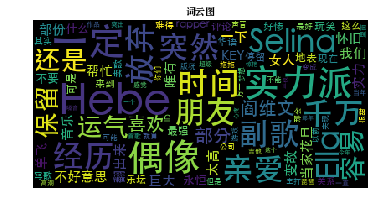

In [48]:
wc_1 = WordCloud(font_path=r"System/Library/Fonts/STHeiti Medium.ttc",max_font_size=50)#,min_font_size=10)#,mode='RGBA',colormap='pink')
wc_1.generate(result)
wc_1.to_file(r"/Users/ycy/Desktop/hotcomment_contents.png")


from matplotlib.font_manager import FontProperties


font = FontProperties(fname="/Library/Fonts/Songti.ttc")
plt.title(u"词云图", fontproperties=font) #指定所绘图名称
#plt.title(u"按年龄看获救分布 (1为获救)", fontproperties=font)
plt.imshow(wc_1)       # 以图片的形式显示词云
plt.axis("off")      #关闭图像坐标系
plt.show()